In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

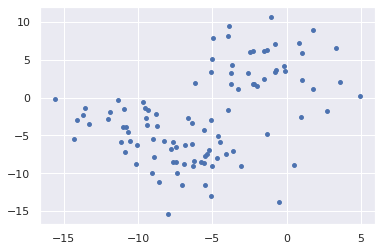

In [ ]:
#RANDOM POINTS
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=100, centers=3, cluster_std=3, random_state=1)
plt.scatter(X[:, 0], X[:, 1], s=15);

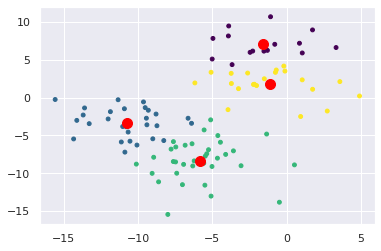

In [ ]:
from sklearn.cluster import KMeans
#Clusters
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=15, cmap='viridis')
#labels = KMeans(6, random_state=0).fit_predict(X)
#plt.scatter(X[:, 0], X[:, 1], c=labels,s=50, cmap='viridis');

#Centroids
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c="red", s=100);

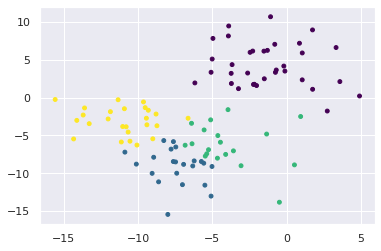

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=3):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters] #Random array of n_clusters length
    centers = X[i]
    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0) for i in range(n_clusters)])
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels
centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=15, cmap='viridis');

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

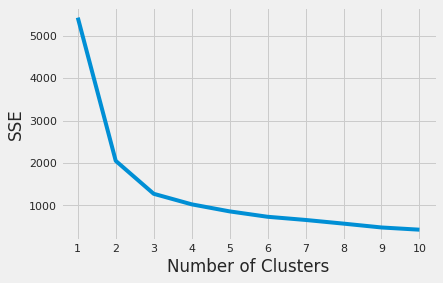

In [ ]:
 plt.style.use("fivethirtyeight")
 plt.plot(range(1, 11), sse)
 plt.xticks(range(1, 11))
 plt.xlabel("Number of Clusters")
 plt.ylabel("SSE")
 plt.show()

In [ ]:
#TO REMEMBER
#kmeans.labels_//Which cluster each point belong
#kmeans.predict([[0, 0], [12, 3]])//It predict to whitch cluster it should belong
#kmeans.cluster_centers_//Where the centroids are

#ALGORITM
#Guess some cluster centers
#Repeat until converged
#E-Step: assign points to the nearest cluster center - EXPECTATION STEP
#M-Step: set the cluster centers to the mean - MAXIMIZATION STEP

#LINKS
#https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
#https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
#https://realpython.com/k-means-clustering-python/
#https://github.com/codebasics/py/blob/master/ML/13_kmeans/Exercise/13_kmeans_exercise.ipynb

IndentationError: ignored